In [99]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀(예측)
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split # 데이터 나누기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자 한글설정
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [100]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [101]:
df.shape

(159, 6)

In [102]:
fish_input = df.iloc[:,1:].to_numpy()
fish_target = df['Species'].to_numpy()

# train,test세트 분리
train_input,test_input,train_target,test_target = train_test_split(
    fish_input,fish_target
)

# 판다스로 변경
# pd.DataFrame(fish_input)

In [103]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [104]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# lr.fit(train_scaled,train_target)

In [105]:
# print(lr.score(train_scaled,train_target))
# print(lr.score(test_scaled,test_target))

In [106]:
# 경사하강법 - 머신러닝을 훈련하는방법, 최적화하는 방법
from sklearn.linear_model import SGDClassifier


In [107]:
# loss = 회귀(예측)함수 가져와서 적용
sc = SGDClassifier(loss = 'log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8487394957983193
0.85


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [108]:
# 다시 재훈련이 가능함
# partial_fit : 이전 기울기, y절편을 가지고 다시 학습함
sc.partial_fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7058823529411765
0.7


에포크, 과대/과소적합 문제

In [109]:
# 그래프를 그리기 위한 리스트
train_score =  []
test_score = []

classes = np.unique(train_target)

In [110]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [111]:
for _ in range(0,300) :
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc1 = sc.score(train_scaled,train_target)
    train_score.append(sc1)
    sc2 = sc.score(test_scaled,test_target)
    test_score.append(sc2)

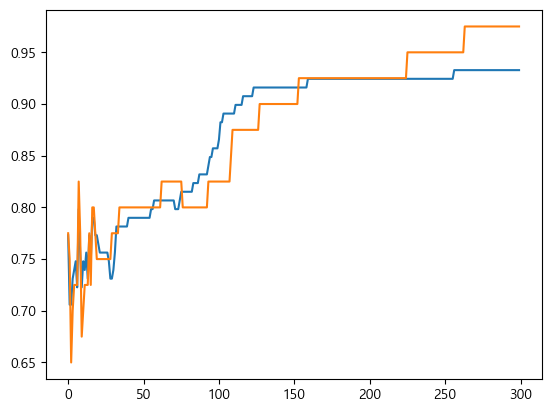

In [112]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [119]:
# tol=None 무조건 
sc = SGDClassifier(loss='log_loss',max_iter=90,tol=None,random_state=42)
sc.fit(train_scaled,train_target)


print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9243697478991597
0.975


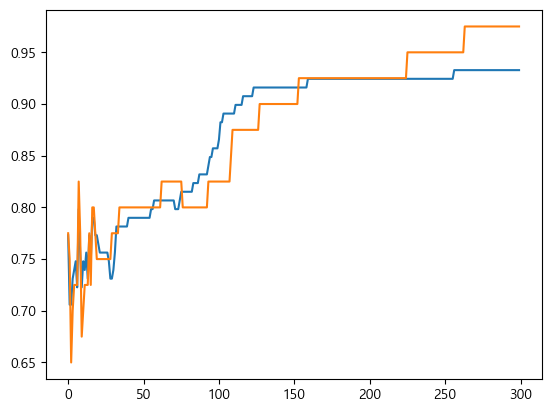

In [120]:
# 경사하강법
# 반복해서 머신러닝 훈련을 시켜, 정답률을 높여주는 방법